<a href="https://colab.research.google.com/github/ahitagnied/deep-learning/blob/main/01-deep-neural-networks/012-cnn/cnn_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implemending a CNN using PyTorch

### Prepare MNIST Data

In [99]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [100]:
# Data Preprocessing
transform = transforms.ToTensor()

train = datasets.MNIST(root='/mnist_data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='/mnist_data', train=False, download=True, transform=transform)

In [101]:
# Create batch sizes of 10
train_loader = DataLoader(train, batch_size=10, shuffle='True')
test_loader = DataLoader(test, batch_size=10, shuffle='False')

# CNN Model
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1) # Gives out Image: 6, 1, 26, 26; 28-3+1 = 26 -> max pool -> 6, 1, 13, 13
    self.conv2 = nn.Conv2d(6, 16, 3, 1) # Image: 13-3+1=11; 16, 1, 11, 11 -> max pool -> 16, 1, 5, 5
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2) # 2x2 kernel, stride = 2
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2) # 2x2 kernel, stride = 2

    # Reshape into a column vector
    x = x.view(-1, 16*5*5)

    # Dense Layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    return x


In [119]:
# Create Model
torch.manual_seed(40)
n = CNN()

# Learning Rate
lr = 0.001

# Loss Function
lf = nn.CrossEntropyLoss()
opt = torch.optim.Adam(n.parameters(), lr)

In [120]:
import time
start = time.time()

# Track loss
epochs = 2
trainl = []

# For each epoch
for i in range(epochs):
  # Train
  for b, (x, y) in enumerate(train_loader):
    y_pred = n(x)
    loss = lf(y_pred, y)

    opt.zero_grad() # Set all grads to 0 to be updated after BP

    # BP
    loss.backward()
    opt.step() # Update weights

    # Updates
    if b%1000 == 0:
      print(f"Epoch: {i}, Batch: {b}, Training Loss: {loss.item()}")
      trainl.append(loss.item())

end = time.time()
total = end - start
print(f"Time taken: {total}")

Epoch: 0, Batch: 0, Training Loss: 2.3198745250701904
Epoch: 0, Batch: 1000, Training Loss: 0.45245361328125
Epoch: 0, Batch: 2000, Training Loss: 0.17323723435401917
Epoch: 0, Batch: 3000, Training Loss: 0.06723577529191971
Epoch: 0, Batch: 4000, Training Loss: 0.08883165568113327
Epoch: 0, Batch: 5000, Training Loss: 0.0014088158495724201
Epoch: 1, Batch: 0, Training Loss: 0.0018037337576970458
Epoch: 1, Batch: 1000, Training Loss: 0.09600308537483215
Epoch: 1, Batch: 2000, Training Loss: 0.2813270092010498
Epoch: 1, Batch: 3000, Training Loss: 0.009981262497603893
Epoch: 1, Batch: 4000, Training Loss: 0.006299096159636974
Epoch: 1, Batch: 5000, Training Loss: 0.0443774089217186
Time taken: 67.34832167625427


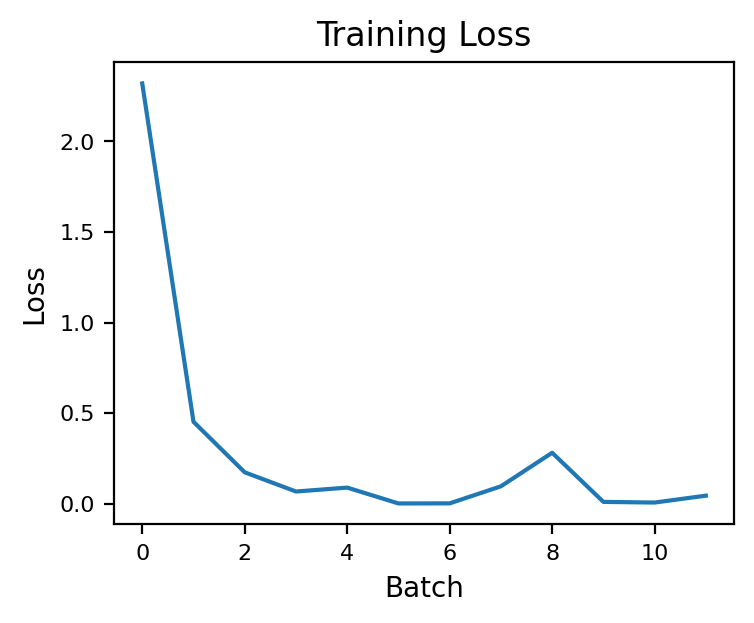

Batch: 0, Testing Loss: 0.0052336049266159534
Batch: 100, Testing Loss: 0.010681739076972008
Batch: 200, Testing Loss: 0.0023234908003360033
Batch: 300, Testing Loss: 0.1285923570394516
Batch: 400, Testing Loss: 0.0007946905680000782
Batch: 500, Testing Loss: 0.14031417667865753
Batch: 600, Testing Loss: 4.580419772537425e-05
Batch: 700, Testing Loss: 0.0015969120431691408
Batch: 800, Testing Loss: 0.00013993409811519086
Batch: 900, Testing Loss: 0.027278071269392967


In [129]:
# Plot Training Loss
plt.figure(figsize=(4, 3), dpi=200)
plt.plot(trainl)
plt.xticks(fontsize=8); plt.yticks(fontsize=8)
plt.title("Training Loss")
plt.xlabel("Batch", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.show()

# Testing
with torch.no_grad():
  for b, (x, y) in enumerate(test_loader):
    y_pred = n(x)
    loss = lf(y_pred, y)

    if b%100 == 0:
      print(f"Batch: {b}, Testing Loss: {loss.item()}")